DNA to DNA autoencoder
by Ivan Klimuk

In [ ]:
# import some stuff

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Input, Dense, Dropout, Lambda
from keras.models import Model
from keras import backend as B
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import metrics as m

In [28]:
import os
os.chdir('D:\\Studies\\MicroarraytoRNAseq')

In [29]:
# custom metric (ratio of mistake distance to the length of the original vector)

def dist_error(y, y_pred):
    dist = B.sqrt(B.sum((y - y_pred)**2))
    y_length = B.sqrt(B.sum(y**2))
    return dist/y_length

In [30]:
# metric (the R2 coefficient of determination)

def R2_score(y_true, y_pred):
    SS_res =  B.sum(B.square( y_true-y_pred )) 
    SS_tot = B.sum(B.square( y_true - B.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + B.epsilon()) )

In [31]:
# load data

object_length = 32
DNA = np.loadtxt('data/hta2.txt', skiprows=1, usecols=range(1,object_length+1))

print('DNA object:')
print(DNA[0])

DNA object:
[ 6.023  6.031  5.844  7.663  6.139  6.077  6.69   6.816  5.5    7.361
  6.238  5.184  6.651  7.23   8.171  7.125  7.925  7.1    7.707  8.05
  7.787  7.749  7.672  6.144  6.667  6.601  6.981  6.523  7.011  6.993
  6.536  7.333]


In [32]:
# have a look at the maximal value of DNA

DNAmax = np.amax(DNA)
print('DNA max value:', DNAmax)

DNA max value: 13.323


In [36]:
# create the net layer by layer

input = Input(shape=(32,))

normalized_input = Lambda(lambda x: x/DNAmax)(input)

encoded = Dense(16, activation='relu')(normalized_input)

normalized_output = Dense(32, activation='sigmoid')(encoded)

output = Lambda(lambda x: x*DNAmax)(normalized_output)

DNA_to_DNA = Model(input, output)

DNA_to_DNA.compile(optimizer='rmsprop',
                   loss='mse',
                   metrics=[R2_score]
                   )

In [37]:
# model training

training_history = DNA_to_DNA.fit(x=DNA, y=DNA,
                                  epochs=200,
                                  shuffle=True,
                                  validation_split=0.2,
                                  verbose=2
                                 )

Train on 16026 samples, validate on 4007 samples
Epoch 1/200
0s - loss: 1.8948 - R2_score: -4.3779e-02 - val_loss: 1.2925 - val_R2_score: 0.2848
Epoch 2/200
0s - loss: 0.6517 - R2_score: 0.6469 - val_loss: 0.3655 - val_R2_score: 0.8157
Epoch 3/200
0s - loss: 0.2621 - R2_score: 0.8573 - val_loss: 0.2349 - val_R2_score: 0.8802
Epoch 4/200
0s - loss: 0.1945 - R2_score: 0.8935 - val_loss: 0.2038 - val_R2_score: 0.8939
Epoch 5/200
0s - loss: 0.1666 - R2_score: 0.9081 - val_loss: 0.1735 - val_R2_score: 0.9091
Epoch 6/200
0s - loss: 0.1494 - R2_score: 0.9172 - val_loss: 0.1488 - val_R2_score: 0.9222
Epoch 7/200
0s - loss: 0.1373 - R2_score: 0.9235 - val_loss: 0.1551 - val_R2_score: 0.9174
Epoch 8/200
0s - loss: 0.1286 - R2_score: 0.9285 - val_loss: 0.1277 - val_R2_score: 0.9327
Epoch 9/200
0s - loss: 0.1226 - R2_score: 0.9317 - val_loss: 0.1218 - val_R2_score: 0.9355
Epoch 10/200
0s - loss: 0.1177 - R2_score: 0.9343 - val_loss: 0.1444 - val_R2_score: 0.9215
Epoch 11/200
0s - loss: 0.1142 - R2

0s - loss: 0.0692 - R2_score: 0.9608 - val_loss: 0.0702 - val_R2_score: 0.9608
Epoch 91/200
0s - loss: 0.0691 - R2_score: 0.9610 - val_loss: 0.0713 - val_R2_score: 0.9601
Epoch 92/200
0s - loss: 0.0689 - R2_score: 0.9609 - val_loss: 0.0704 - val_R2_score: 0.9606
Epoch 93/200
0s - loss: 0.0688 - R2_score: 0.9612 - val_loss: 0.0748 - val_R2_score: 0.9580
Epoch 94/200
0s - loss: 0.0688 - R2_score: 0.9610 - val_loss: 0.0689 - val_R2_score: 0.9615
Epoch 95/200
0s - loss: 0.0687 - R2_score: 0.9606 - val_loss: 0.0757 - val_R2_score: 0.9575
Epoch 96/200
0s - loss: 0.0686 - R2_score: 0.9614 - val_loss: 0.0757 - val_R2_score: 0.9575
Epoch 97/200
0s - loss: 0.0683 - R2_score: 0.9613 - val_loss: 0.0705 - val_R2_score: 0.9605
Epoch 98/200
0s - loss: 0.0683 - R2_score: 0.9612 - val_loss: 0.0731 - val_R2_score: 0.9590
Epoch 99/200
0s - loss: 0.0684 - R2_score: 0.9614 - val_loss: 0.0703 - val_R2_score: 0.9606
Epoch 100/200
0s - loss: 0.0682 - R2_score: 0.9615 - val_loss: 0.0690 - val_R2_score: 0.9614


0s - loss: 0.0637 - R2_score: 0.9638 - val_loss: 0.0660 - val_R2_score: 0.9628
Epoch 180/200
0s - loss: 0.0637 - R2_score: 0.9639 - val_loss: 0.0648 - val_R2_score: 0.9635
Epoch 181/200
0s - loss: 0.0636 - R2_score: 0.9639 - val_loss: 0.0738 - val_R2_score: 0.9582
Epoch 182/200
0s - loss: 0.0637 - R2_score: 0.9638 - val_loss: 0.0681 - val_R2_score: 0.9616
Epoch 183/200
0s - loss: 0.0636 - R2_score: 0.9639 - val_loss: 0.0722 - val_R2_score: 0.9592
Epoch 184/200
0s - loss: 0.0635 - R2_score: 0.9638 - val_loss: 0.0696 - val_R2_score: 0.9607
Epoch 185/200
0s - loss: 0.0636 - R2_score: 0.9636 - val_loss: 0.0650 - val_R2_score: 0.9634
Epoch 186/200
0s - loss: 0.0635 - R2_score: 0.9638 - val_loss: 0.0675 - val_R2_score: 0.9619
Epoch 187/200
0s - loss: 0.0635 - R2_score: 0.9641 - val_loss: 0.0697 - val_R2_score: 0.9606
Epoch 188/200
0s - loss: 0.0635 - R2_score: 0.9641 - val_loss: 0.0677 - val_R2_score: 0.9619
Epoch 189/200
0s - loss: 0.0634 - R2_score: 0.9642 - val_loss: 0.0684 - val_R2_score

In [38]:
# save weights of our model

DNA_weights_name = './models/dna_to_dna.h5'
DNA_to_DNA.save_weights(DNA_weights_name)

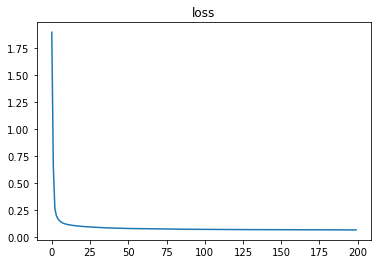

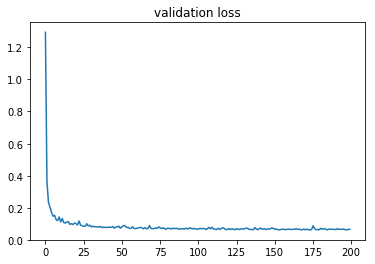

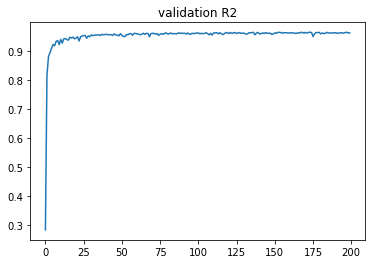

In [40]:
plt.plot(training_history.history['loss'])
plt.title('loss')
plt.show()
plt.plot(training_history.history['val_loss'])
plt.title('validation loss')
plt.show()
plt.plot(training_history.history['val_R2_score'])
plt.title('validation R2')
plt.show()

In [15]:
n = 10

print(DNA[n])
print(DNA_to_DNA.predict(np.array([DNA[n]])))
print(np.sum(DNA[n]**2))
print(np.sum(DNA_to_DNA.predict(np.array([DNA[n]])) - DNA[n])**2)

[ 4.824  4.828  4.752  5.423  4.87   4.839  5.056  4.89   4.781  4.913
  4.519  4.853  4.959  4.566  5.585  5.142  5.721  4.96   5.075  5.486
  5.348  5.364  5.147  4.978  4.837  4.796  5.239  4.947  4.8    4.827
  4.735  4.996]
[[ 4.71843624  4.78150988  4.71099329  5.3306694   4.80034447  4.83971071
   4.99342442  4.78496599  4.57334709  4.70285797  4.6805706   4.88110113
   4.89081907  4.45439959  5.47477055  4.97912264  5.4810729   4.95595264
   5.18946934  5.39305019  5.2620573   5.32264423  5.14447165  4.81053638
   4.78704166  4.74632645  5.12639618  4.72317028  4.80741119  4.58996916
   4.78653622  4.68477106]]
803.087216
7.01232830219
